In [953]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action="ignore")
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import joblib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# !pip install catboost
# !pip install lightgbm
# !pip install xgboost

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
seed = 8
np.random.seed(seed)

In [954]:
train=pd.read_csv("../input/heart-disease-prediction-tfug-chd-oct-2022/train.csv")
test = pd.read_csv("../input/heart-disease-prediction-tfug-chd-oct-2022/test.csv")

In [955]:
train = train[train["cholesterol"] < 440]

In [956]:
continious_columns = ['age','resting bp s','cholesterol','max heart rate','oldpeak']
categorical_columns = ['sex','chest pain type','fasting blood sugar',"exercise angina"]


In [957]:
test_index = pd.read_csv("../input/heart-disease-prediction-tfug-chd-oct-2022/test.csv")

In [958]:
train[continious_columns].head()

,age,resting bp s,cholesterol,max heart rate,oldpeak
0,72,136,209,111,-2.917
1,61,113,341,186,1.317
2,60,128,388,103,0.061
3,65,136,201,142,1.231
4,60,115,331,141,-0.163


In [959]:
chest_agg=train.groupby(["sex"]).agg({"resting bp s":["mean","max","min"],
                                                 "max heart rate":["mean","max","min","var"],
                                               "cholesterol":["mean","std","var","min","max"],
                                                "age":["min","max","mean","var"]
                                                  })
chest_agg.columns = pd.Index(['chest_' + e[0] + "_" + e[1].upper() for e in chest_agg.columns.tolist()])

#train = train.join(chest_agg, how='left', on=["sex"])

In [960]:
chest_agg=test.groupby(["sex"]).agg({"resting bp s":["mean","max","min"],
                                             "max heart rate":["mean","max","min","var"],
                                               "cholesterol":["mean","std","var","min","max"],
                                               "age":["min","max","mean","var"]
                                                })
chest_agg.columns = pd.Index(['chest_' + e[0] + "_" + e[1].upper() for e in chest_agg.columns.tolist()])

#test = test.join(chest_agg, how='left', on=["sex"])



In [961]:
#train["Age_chest_min"] = train["age"] * (train["chest_resting bp s_MIN"]+1)
#test["Age_chest_min"] = test["age"] * (test["chest_resting bp s_MIN"]+1)

In [962]:
#test.drop(["resting bp s","max heart rate","oldpeak","cholesterol","age"],axis=1,inplace=True)
#train.drop(["resting bp s","max heart rate","oldpeak","cholesterol","age"],axis=1,inplace=True)

In [963]:
#def prep(dataframe):
 #   dataframe["NEW_Max_Age"] = dataframe["max heart rate"] / dataframe["age"]
  #  dataframe['NEW_cholesterol_CAT'] = pd.cut(x=dataframe['cholesterol'], bins=[0,200,239,603], labels=[0,1,2])
   # return dataframe

In [964]:
#train = prep(train)
#test=prep(test)

<AxesSubplot:>

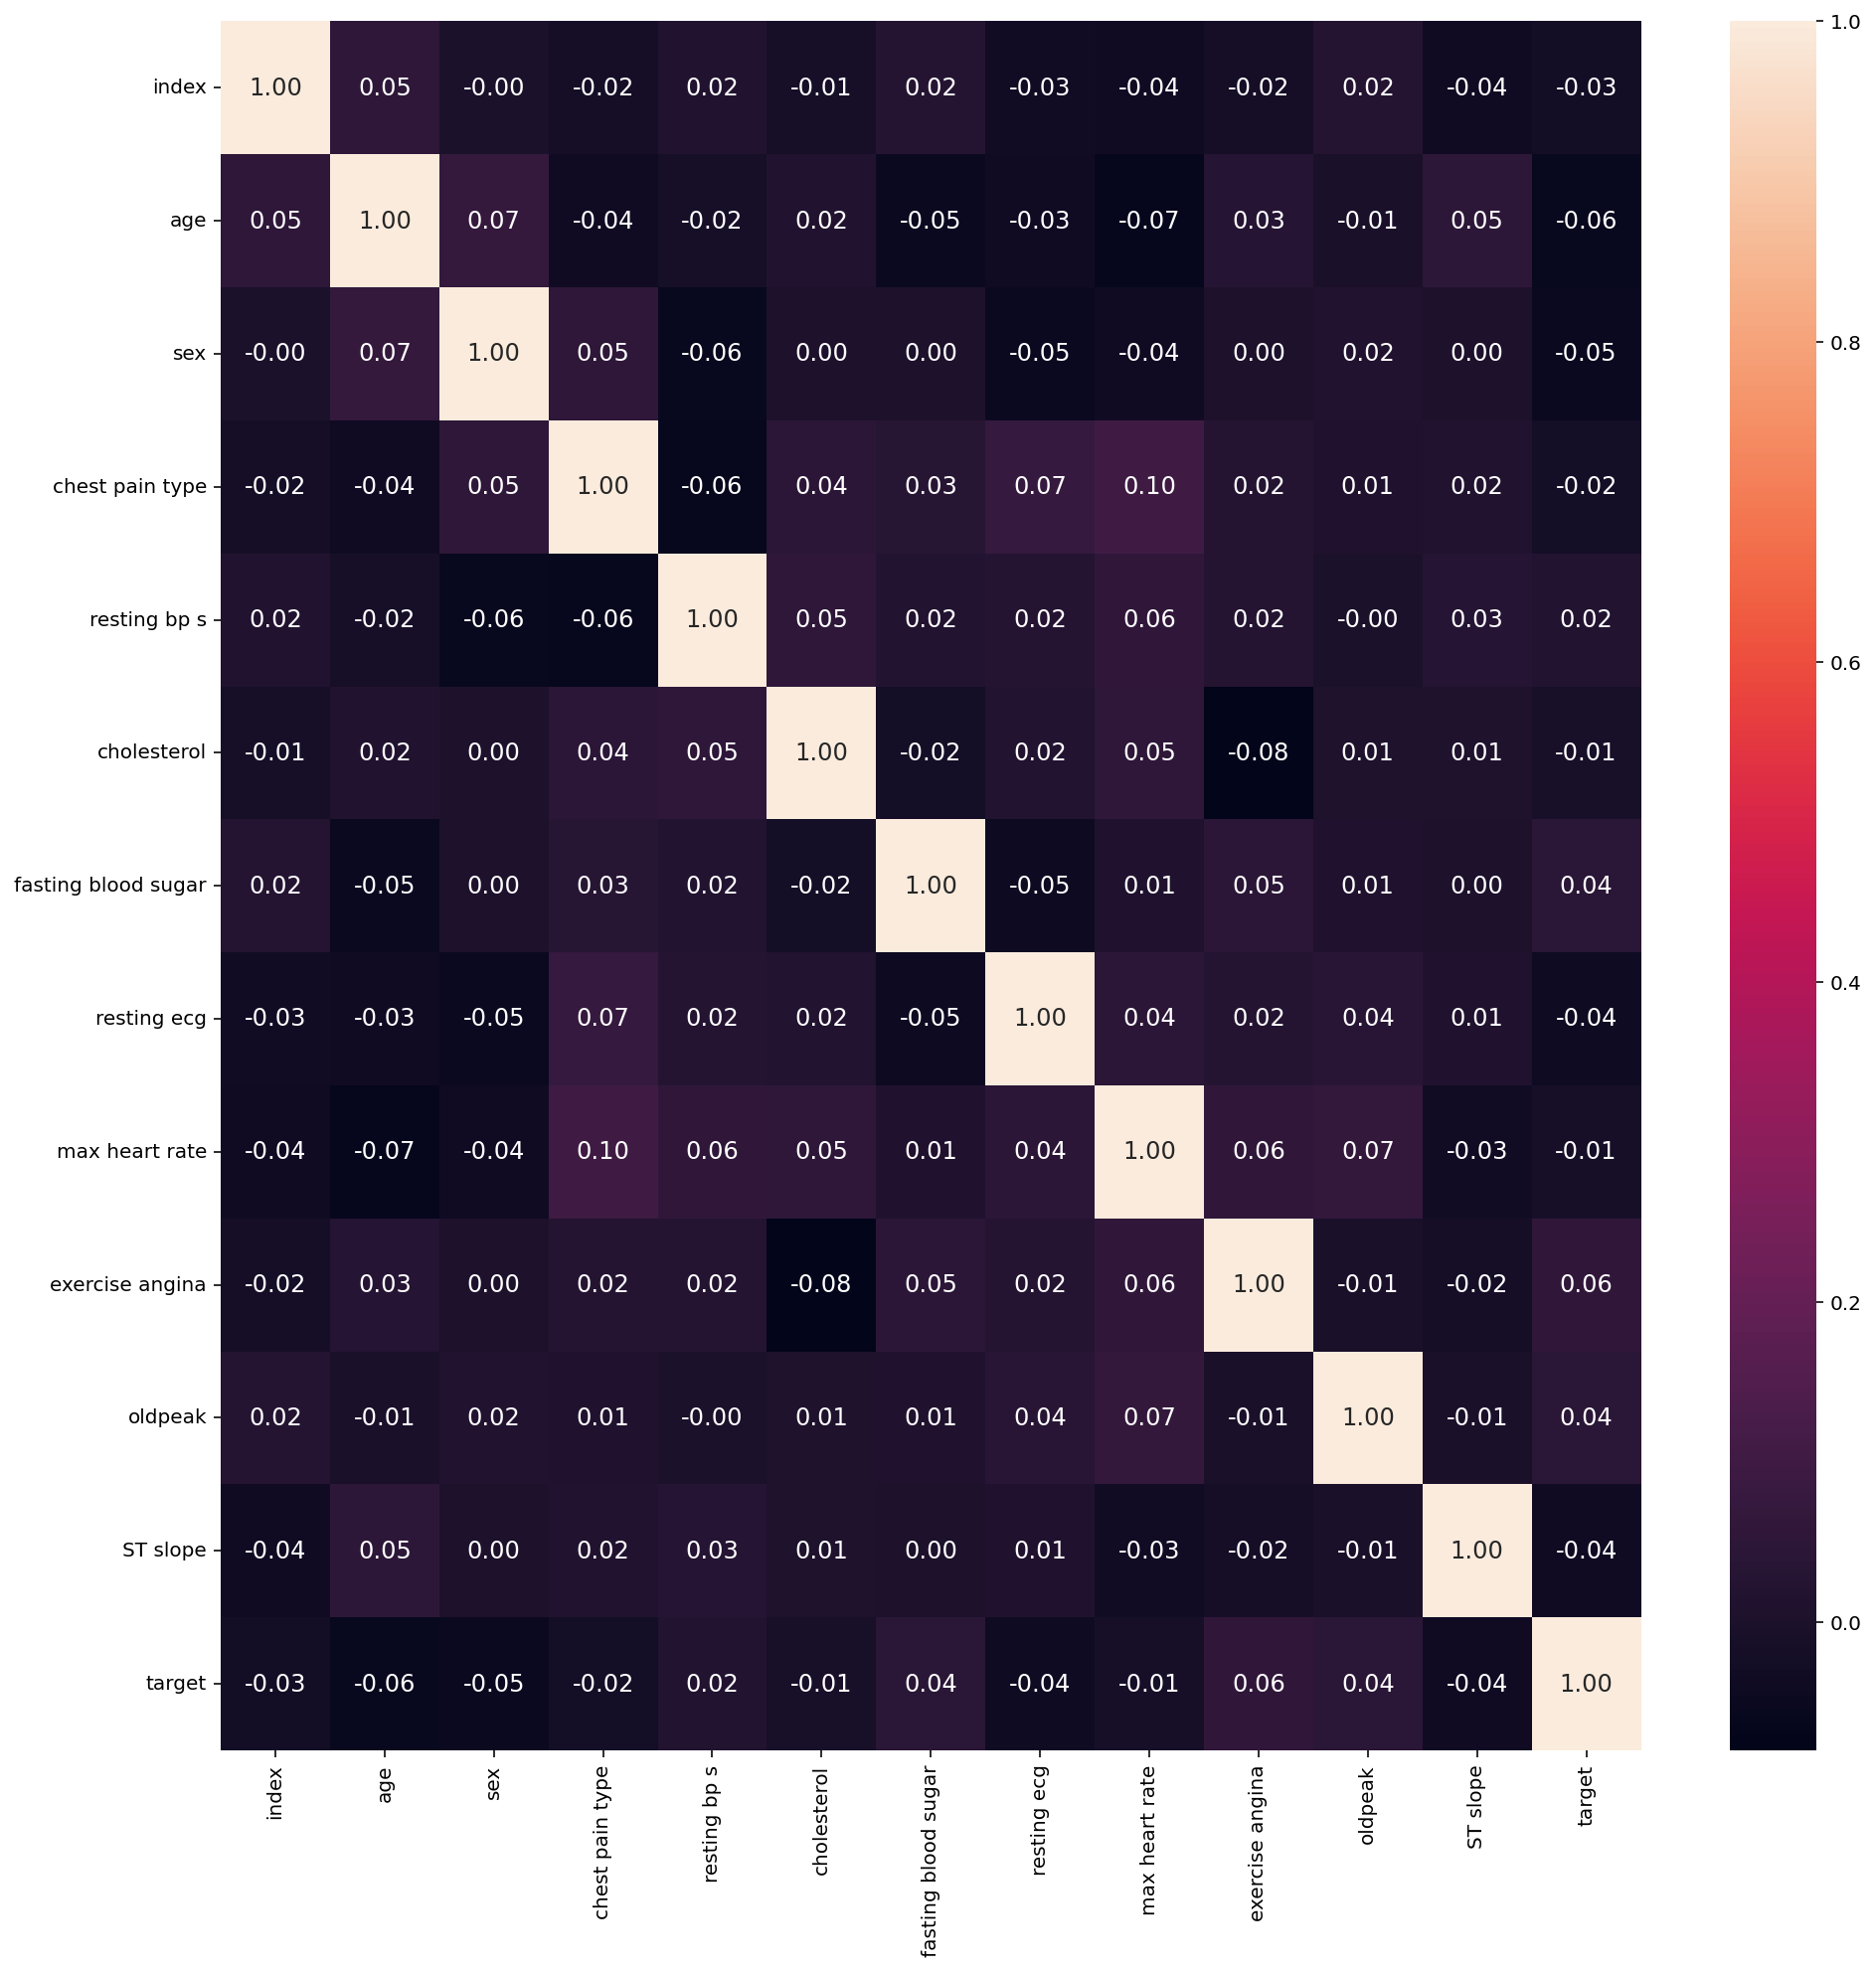

In [965]:
plt.figure(figsize=(16, 16))
sns.heatmap(train.corr(), annot=True, fmt=".2f", annot_kws={'size':12})

In [966]:
"chest_cholesterol_MEAN","chest_cholesterol_STD","chest_age_MAX","chest_age_STD"

('chest_cholesterol_MEAN',
 'chest_cholesterol_STD',
 'chest_age_MAX',
 'chest_age_STD')

In [967]:
#train.corr("target")

In [968]:
# set target variable of train
y_train = train['target']

# set explanatory variable
x_train = train.drop(['target',"index",'resting ecg','ST slope'], axis=1)

# set explanatory variable of test
T = test.drop(["index",'resting ecg','ST slope'],axis=1)

In [969]:
catag = categorical_columns

In [970]:
for cat in catag:
    
    # generate Label Encoder object
    le_train = LabelEncoder()
    
    # objec
    le_train = le_train.fit(train[cat])
    
    # Encoding for train_df
    train[cat] = le_train.transform(train[cat])
    
    # Encoding for test_df
    test[cat] = le_train.transform(test[cat])
    
    # concert into category type for LightGBM
    train[cat] = train[cat].astype('category')
    test[cat] = test[cat].astype('category')

In [984]:
lgbm_params = {
    'boosting_type': 'gbdt',        # Gradient Boosting Decision Tree
    'objective': 'binary',          # Binary-classification
    'metric': 'binary_logloss',     # metric
    'learning_rate': 0.08, 
    
    # -- acceleration of model learning --
    'num_leaves': 50, 
    
    'n_estimators': 300000, 
    'importance_type': 'gain',      # for variables' importance
    
    # -- for model overfitting --
    'min_data_in_leaf': 10, 
    'min_sum_hessian_in_leaf': 1*1e-3,
    'lambda_l1': 0.0,               # L1 regularization
    'lambda_l2': 0.0,               # L2 regularization
    #"max_bin": 300,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'feature_fraction': 0.8, 

    'random_seed': 123              # You can set random_seed by yourself
}

In [985]:
from sklearn.metrics import log_loss
folds = 10

# list of learned models based on cross-validation
models = []

# list of Logloss(metric) based on cross-validation
logloss = []

# NumPy list for prediction of validation-data 
out_of_fold = np.zeros(len(x_train))

# DataFrame for variables' importance 
imp_df = pd.DataFrame()


# ---- StratifiedKFold Cross-Validation ----

# generate StratifiedKFold object and obtain its index(train and validation)
cv = list(StratifiedKFold(n_splits=folds, shuffle=True, random_state=928).split(x_train, y_train))


# CV
for n_fold in np.arange(folds):
    
    # obtain its train-index
    train_index = cv[n_fold][0]
    
    # obtain its validation-index
    valid_index = cv[n_fold][1]
    
    # explanatory variable of train
    x_train_cv = x_train.iloc[train_index]
    
    # target variable of train
    y_train_cv = y_train.iloc[train_index]
    
    # explanatory variable of validation
    x_valid_cv = x_train.iloc[valid_index]
    
    # target variable of validation
    y_valid_cv = y_train.iloc[valid_index]
    
    
    
    # generate LightGBM model object
    model = LGBMClassifier(**lgbm_params)
    
    
    # model fitting
    model.fit(
        x_train_cv, 
        y_train_cv, 
        eval_set = [(x_train_cv, y_train_cv), (x_valid_cv, y_valid_cv)], 
        early_stopping_rounds = 100, 
        categorical_feature = categorical_columns,
        
        verbose = 50, 
    )
    
    
    # Logloss
    # prediction from train-data
    y_pred_train = model.predict_proba(x_train_cv, num_iteration=model.best_iteration_)[:, 1]
    
    # prediction from validation-data
    y_pred_valid = model.predict_proba(x_valid_cv, num_iteration=model.best_iteration_)[:, 1]
    
    
    # Logloss
    # Logloss based on train-data
    temp_logloss_train = log_loss(y_train_cv, y_pred_train)
    
    # Logloss based on validation-data
    temp_logloss_valid = log_loss(y_valid_cv, y_pred_valid)
    
    # print Logloss
    print(f'\nLogloss(train_data) = {temp_logloss_train:.4f}')
    print(f'Logloss(valid_data) = {temp_logloss_valid:.4f}\n')
    
    # append Logloss
    logloss.append([temp_logloss_train, temp_logloss_valid])

    
    # append learned model
    models.append(model)
    
    # append prediction of validation-data 
    out_of_fold[valid_index] = y_pred_valid


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[50]	training's binary_logloss: 0.282288	valid_1's binary_logloss: 0.806153
[100]	training's binary_logloss: 0.133017	valid_1's binary_logloss: 0.888145

Logloss(train_data) = 

In [986]:
##### convert rmses-list into NumPy
logloss_np = np.array(logloss)

# average Logloss of train-data
logloss_train_mean = logloss_np[:, 0].mean()
print(f'Logloss(train_data)_mean = {logloss_train_mean:.3f}')

# average Logloss of validation-data
logloss_valid_mean = logloss_np[:, 1].mean()
print(f'Logloss(valid_data)_mean = {logloss_valid_mean:.3f}')

Logloss(train_data)_mean = 0.635
Logloss(valid_data)_mean = 0.689


In [974]:
preds_test = []


# predict with learned models of each cross-validation
for model in models:
    
    # predict
        pred = model.predict_proba(T, num_iteration=model.best_iteration_)[:, 1]
    
    # append prediction
        preds_test.append(pred)

In [975]:
preds_test_np = np.array(preds_test)

# average prediction
preds_test_np_mean = preds_test_np.mean(axis=0)

In [976]:
#pred = model.predict(x_test)
my_submission = pd.DataFrame({'index': test_index["index"], 'target': preds_test_np_mean})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)